# Summary

This jupyter notebook calculates a handful of metadata/high level statistics about the dataset

In [1]:
import pandas as pd
import numpy as np
import os, re
from datetime import date, timedelta
import matplotlib.pyplot as plt

from analysis_utils import get_num_appearances, get_all_entries, gini

### Total entries

In [2]:
all_tracks = pd.read_csv('../spotify_data/all_tracks.csv')
print('Total number of unique songs: %s' % len(all_tracks.drop_duplicates('track_id')))
print('Total number of playlist entries: %s' % len(all_tracks))

Total number of unique songs: 19218
Total number of playlist entries: 212199


#### Spotify curated

In [3]:
unique_tracks = pd.read_csv('../spotify_data/unique_entries_sorted/spotify_curated_unique_track.csv')
result = get_num_appearances(unique_tracks[['track_id']], 'track_id', 'spotify_curated')
print('Nnumber of unique entries in all spotify curated lists: %s' % len(unique_tracks))
print('Total number of entries in all spotify curated lists: %s' % result['total_entries'])

Nnumber of unique entries in all spotify curated lists: 11554
Total number of entries in all spotify curated lists: 96336


#### User curated

In [4]:
unique_tracks = pd.read_csv('../spotify_data/unique_entries_sorted/user_curated_unique_track.csv')
result = get_num_appearances(unique_tracks[['track_id']], 'track_id', 'user_curated')
print('Nnumber of unique entries in all user curated lists: %s' % len(unique_tracks))
print('Total number of entries in all user curated lists: %s' % result['total_entries'])

Nnumber of unique entries in all user curated lists: 9714
Total number of entries in all user curated lists: 102099


### Average num. entries per playlist

#### Spotify curated

In [11]:
rootdir = '../spotify_data/playlist_tracks/spotify_curated/'
playlist_lengths = []

for subdir, dirs, files in os.walk(rootdir):
    # Regex to avoid stepping into additions_and_removals dirs when walking through
    test_string = '.*\/additions_and_removals'
    test = re.fullmatch(test_string, format(subdir))

    if test: continue
    if subdir == rootdir: continue

    file_date = date(2019, 5, 12)

    playlist_name = os.path.basename(str(subdir))

    for x in range(len(files)-1):            
        playlist = pd.read_csv(subdir + '/' + str(file_date) + '.csv')

        playlist_lengths.append(len(playlist))
        if file_date == date(2019, 8, 25):
            break
        else:
            file_date = file_date + timedelta(days=7)
            
print('Average number of entries per spotify curated list: %f'
      % np.mean(playlist_lengths))
print('Median number of entries per spotify curated list: %f'
      % np.median(playlist_lengths))

Average number of entries per spotify curated list: 86.789189
Median number of entries per spotify curated list: 65.000000


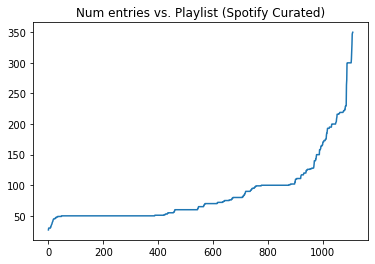

In [10]:
playlist_lengths.sort()
plt.title('Num entries vs. Playlist (Spotify Curated)')
plt.plot(playlist_lengths)

#### User curated

In [12]:
rootdir = '../spotify_data/playlist_tracks/user_curated/'
playlist_lengths = []

for subdir, dirs, files in os.walk(rootdir):
    # Regex to avoid stepping into additions_and_removals dirs when walking through
    test_string = '.*\/additions_and_removals'
    test = re.fullmatch(test_string, format(subdir))

    if test: continue
    if subdir == rootdir: continue

    file_date = date(2019, 5, 12)

    playlist_name = os.path.basename(str(subdir))

    for x in range(len(files)-1):            
        playlist = pd.read_csv(subdir + '/' + str(file_date) + '.csv')

        playlist_lengths.append(len(playlist))
        if file_date == date(2019, 8, 25):
            break
        else:
            file_date = file_date + timedelta(days=7)
            
print('Average number of entries per user curated list: %f'
      % np.mean(playlist_lengths))
print('Median number of entries per user curated list: %f'
      % np.median(playlist_lengths))

Average number of entries per user curated list: 91.981081
Median number of entries per user curated list: 80.000000


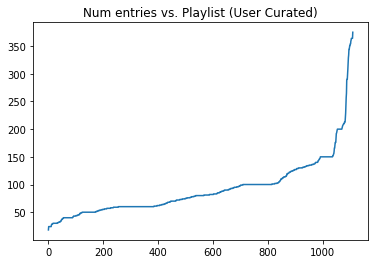

In [26]:
playlist_lengths.sort()
plt.title('Num entries vs. Playlist (User Curated)')
plt.plot(playlist_lengths)

### Turnover rate of entries

#### total additions

In [5]:
rootdir = '../spotify_data/playlist_tracks/spotify_curated/'
total_additions_spotify = 0

for subdir, dirs, files in os.walk(rootdir):
    # Regex to only count additions and removals
    test_string = '.*\/additions_and_removals'
    test = re.fullmatch(test_string, format(subdir))
    if not test: continue
    
    file_date = date(2019, 5, 19)

    playlist_turnovers = []
    for x in range(len(files)-1):
        additions_path = subdir + '/' + str(file_date) + '-add.csv'
        total_additions_spotify += len(pd.read_csv(additions_path))

        if file_date == date(2019, 8, 25):
            break
        else:
            file_date = file_date + timedelta(days=7)
            
print('Number of spotify additions: %d' % total_additions_spotify)

Number of spotify additions: 15740


In [6]:
rootdir = '../spotify_data/playlist_tracks/user_curated/'
total_additions_user = 0

for subdir, dirs, files in os.walk(rootdir):
    # Regex to only count additions and removals
    test_string = '.*\/additions_and_removals'
    test = re.fullmatch(test_string, format(subdir))
    if not test: continue
    
    file_date = date(2019, 5, 19)

    playlist_turnovers = []
    for x in range(len(files)-1):
        additions_path = subdir + '/' + str(file_date) + '-add.csv'
        total_additions_user += len(pd.read_csv(additions_path))

        if file_date == date(2019, 8, 25):
            break
        else:
            file_date = file_date + timedelta(days=7)
            
print('Number of user additions: %d' % total_additions_user)

Number of user additions: 7061


#### Spotify curated

In [21]:
rootdir = '../spotify_data/playlist_tracks/spotify_curated/'
turnovers = []

for subdir, dirs, files in os.walk(rootdir):
    # Regex to avoid stepping into additions_and_removals dirs when walking through
    test_string = '.*\/additions_and_removals'
    test = re.fullmatch(test_string, format(subdir))

    if test: continue
    if subdir == rootdir: continue

    file_date = date(2019, 5, 12)

    playlist_turnovers = []
    for x in range(len(files)-1):
        playlist = pd.read_csv(subdir + '/' + str(file_date) + '.csv')
        
        if file_date == date(2019, 5, 12):
            previous_playlist = playlist
            file_date = file_date + timedelta(days=7)
            continue
        
        removals = pd.read_csv(subdir +'/additions_and_removals/' + 
                               str(file_date) +'-rem.csv')
        
        playlist_turnovers.append(len(removals)/len(previous_playlist))
        
        if file_date == date(2019, 8, 25):
            break
        else:
            previous_playlist = playlist
            file_date = file_date + timedelta(days=7)
    
    turnovers.append(np.mean(playlist_turnovers))
            
print('Average turnover per spotify curated list: %f'
      % np.mean(turnovers))
print('Median turnover per spotify curated list: %f'
      % np.median(turnovers))

Average turnover per spotify curated list: 0.173911
Median turnover per spotify curated list: 0.109225


#### User curated

In [33]:
rootdir = '../spotify_data/playlist_tracks/user_curated/'
turnovers = []

for subdir, dirs, files in os.walk(rootdir):
    # Regex to avoid stepping into additions_and_removals dirs when walking through
    test_string = '.*\/additions_and_removals'
    test = re.fullmatch(test_string, format(subdir))

    if test: continue
    if subdir == rootdir: continue

    file_date = date(2019, 5, 12)

    playlist_turnovers = []
    for x in range(len(files)-1):
        playlist = pd.read_csv(subdir + '/' + str(file_date) + '.csv')
        
        if file_date == date(2019, 5, 12):
            previous_playlist = playlist
            file_date = file_date + timedelta(days=7)
            continue
        
        removals = pd.read_csv(subdir +'/additions_and_removals/' + 
                               str(file_date) +'-rem.csv')
        
        playlist_turnovers.append(len(removals)/len(previous_playlist))
        
        if file_date == date(2019, 8, 25):
            break
        else:
            previous_playlist = playlist
            file_date = file_date + timedelta(days=7)
    
    turnovers.append(np.mean(playlist_turnovers))
            
print('Average turnover per user curated list: %f'
      % np.mean(turnovers))
print('Median turnover per user curated list: %f'
      % np.median(turnovers))

Average turnover per user curated list: 0.082906
Median turnover per user curated list: 0.060985


### Most common genre for each playlist

#### Spotify curated

In [39]:
rootdir = '../spotify_data/playlist_tracks/spotify_curated/'

genres_regex = ['hip hop', 'rock', 'blues', 'country', '(electronic)|(edm)',
          'folk', 'jazz', 'latin', 'pop', '(r&b)|(soul)', 'indie', 'house',
          'rap', 'other']
genres = ['hip hop', 'rock', 'blues', 'country', 'edm',
          'folk', 'jazz', 'latin', 'pop', 'r&b and soul', 'indie', 'house',
          'rap', 'other']
genre_counts = [0] * len(genres)

for subdir, dirs, files in os.walk(rootdir):
    # Regex to avoid stepping into additions_and_removals dirs when walking through
    test_string = '.*\/additions_and_removals'
    test = re.fullmatch(test_string, format(subdir))

    if test: continue
    if subdir == rootdir: continue

    file_date = date(2019, 5, 12)

    playlist_name = os.path.basename(str(subdir))
    playlist_genre_counts = [0] * len(genres)
    playlist_weeks = []
    
    # loop through all weeks and concat playlists
    for x in range(len(files)-1):
        playlist = pd.read_csv(subdir + '/' + str(file_date) + '.csv')
        
        playlist_weeks.append(playlist)

        if file_date == date(2019, 8, 25):
            break
        else:
            file_date = file_date + timedelta(days=7)
    
    # find most common playlist genre
    artist_genres = pd.concat(playlist_weeks)[['artist_genres']]
    for row in artist_genres.iterrows():
        artist_genre = str(row[1])
        genre_match = False
            
        for i, genre in enumerate(genres_regex):
            if genre != 'other' and re.match('.*'+genre+'.*', artist_genre): 
                playlist_genre_counts[i] +=1
                genre_match = True
            elif genre == 'other' and not genre_match:
                playlist_genre_counts[i] += 1

    # find mode genre of playlist
    genre_counts[np.argmax(playlist_genre_counts)] +=1
    
print(genre_counts)

[1, 4, 0, 1, 0, 3, 1, 4, 38, 0, 1, 6, 6, 9]


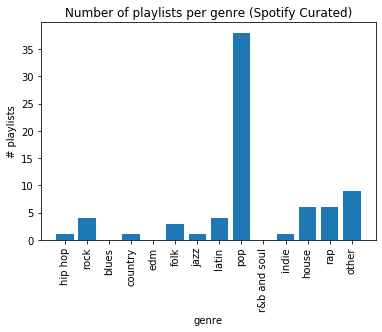

In [52]:
plt.bar(np.arange(len(genre_counts)), genre_counts)
plt.xticks(np.arange(len(genre_counts)), genres, rotation='vertical')
plt.title('Number of playlists per genre (Spotify Curated)')
plt.xlabel('genre')
plt.ylabel('# playlists')
plt.savefig('playlist_per_genre_SCL.png', bbox_inches = 'tight')

#### User curated

In [53]:
rootdir = '../spotify_data/playlist_tracks/user_curated/'

genres_regex = ['hip hop', 'rock', 'blues', 'country', '(electronic)|(edm)',
          'folk', 'jazz', 'latin', 'pop', '(r&b)|(soul)', 'indie', 'house',
          'rap', 'other']
genres = ['hip hop', 'rock', 'blues', 'country', 'edm',
          'folk', 'jazz', 'latin', 'pop', 'r&b and soul', 'indie', 'house',
          'rap', 'other']
genre_counts = [0] * len(genres)

for subdir, dirs, files in os.walk(rootdir):
    # Regex to avoid stepping into additions_and_removals dirs when walking through
    test_string = '.*\/additions_and_removals'
    test = re.fullmatch(test_string, format(subdir))

    if test: continue
    if subdir == rootdir: continue

    file_date = date(2019, 5, 12)

    playlist_name = os.path.basename(str(subdir))
    playlist_genre_counts = [0] * len(genres)
    playlist_weeks = []
    
    # loop through all weeks and concat playlists
    for x in range(len(files)-1):
        playlist = pd.read_csv(subdir + '/' + str(file_date) + '.csv')
        
        playlist_weeks.append(playlist)

        if file_date == date(2019, 8, 25):
            break
        else:
            file_date = file_date + timedelta(days=7)
    
    # find most common playlist genre
    artist_genres = pd.concat(playlist_weeks)[['artist_genres']]
    for row in artist_genres.iterrows():
        artist_genre = str(row[1])
        genre_match = False
            
        for i, genre in enumerate(genres_regex):
            if genre != 'other' and re.match('.*'+genre+'.*', artist_genre): 
                playlist_genre_counts[i] +=1
                genre_match = True
            elif genre == 'other' and not genre_match:
                playlist_genre_counts[i] += 1

    # find mode genre of playlist
    genre_counts[np.argmax(playlist_genre_counts)] +=1
    
print(genre_counts)

[2, 2, 0, 2, 0, 0, 0, 3, 36, 0, 1, 13, 5, 10]


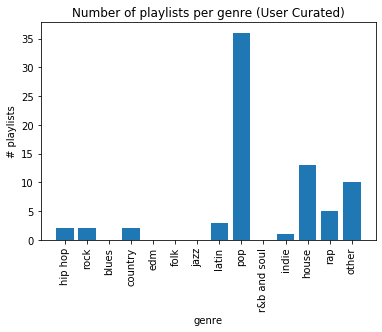

In [54]:
plt.bar(np.arange(len(genre_counts)), genre_counts)
plt.xticks(np.arange(len(genre_counts)), genres, rotation='vertical')
plt.title('Number of playlists per genre (User Curated)')
plt.xlabel('genre')
plt.ylabel('# playlists')
plt.savefig('playlist_per_genre_UCL.png', bbox_inches = 'tight')

#### Distrbution of all tracks across genres

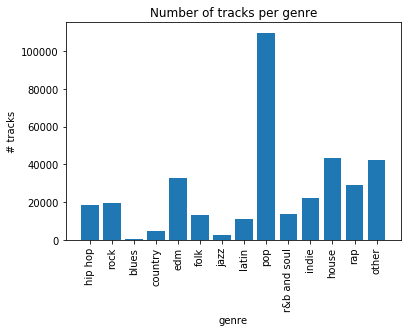

In [57]:
genres = ['hip hop', 'rock', 'blues', 'country', 'edm',
          'folk', 'jazz', 'latin', 'pop', 'r&b and soul', 'indie', 'house',
          'rap', 'other']

# numbers otained from genre_statistics.ipynb
track_genre_appearances = [18369, 19571, 670, 4468, 32664,
                          13430, 2696, 11356, 109776, 13698,
                          22355, 43592, 28990, 42558]

plt.bar(np.arange(len(genres)), track_genre_appearances)
plt.xticks(np.arange(len(genres)), genres, rotation='vertical')
plt.title('Number of tracks per genre')
plt.xlabel('genre')
plt.ylabel('# tracks')
plt.savefig('track_per_genre.png', bbox_inches = 'tight')

### Playlist popularity

#### Spotify curated

In [62]:
df_spotify = pd.read_csv('../spotify_data/playlist_popularity/spotify_curated_playlists.csv')

In [63]:
# most popular playlists
df_spotify.sort_values(by=['2019-08-25'], axis=0, ascending=False).head()

,playlist_name,spotify_ID,2019-05-12,2019-05-19,2019-05-26,2019-06-02,2019-06-09,2019-06-16,2019-06-23,2019-06-30,2019-07-07,2019-07-14,2019-07-21,2019-07-28,2019-08-04,2019-08-11,2019-08-18,2019-08-25
0,Today's Top Hits,37i9dQZF1DXcBWIGoYBM5M,23163839,23211465,23252783,23305161,23344167,23396781,23468237,23561264,23636854,23700385,23766836,23820623,23872244,23914911,23952662,23989084
1,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,11553764,11572111,11591586,11611356,11635504,11656823,11678898,11707055,11729417,11755448,11782847,11807125,11831988,11858034,11887765,11919258
2,¡Viva Latino!,37i9dQZF1DX10zKzsJ2jva,9695056,9721637,9749432,9773079,9793415,9823488,9846264,9883704,9912028,9928645,9940762,10078762,10157700,10185921,10209133,10233932
3,Baila Reggaeton,37i9dQZF1DWY7IeIP1cdjF,9386883,9413612,9431135,9447955,9465106,9487668,9509226,9530555,9548863,9565719,9587163,9605044,9623399,9636730,9652226,9676364
4,Songs to Sing in the Car,37i9dQZF1DWWMOmoXKqHTD,7991715,8030002,8091780,8149384,8221994,8313269,8349298,8386873,8420237,8462733,8523183,8545475,8578087,8602583,8627328,8638936


In [64]:
# least popular playlists
df_spotify.sort_values(by=['2019-08-25'], axis=0, ascending=False).tail()

,playlist_name,spotify_ID,2019-05-12,2019-05-19,2019-05-26,2019-06-02,2019-06-09,2019-06-16,2019-06-23,2019-06-30,2019-07-07,2019-07-14,2019-07-21,2019-07-28,2019-08-04,2019-08-11,2019-08-18,2019-08-25
61,mint Latin,37i9dQZF1DX07RJCJCOYpi,1884474,1883057,1881580,1880142,1878623,1877010,1875070,1873614,1872514,1871129,1869818,1868557,1867117,1865912,1864713,1863519
68,Happy Folk,37i9dQZF1DWSkMjlBZAZ07,1794829,1798409,1801511,1804103,1807346,1809332,1813283,1815513,1819284,1822075,1827061,1829619,1832395,1834367,1836513,1838719
72,Hype,37i9dQZF1DX4eRPd9frC1m,1723622,1728184,1736173,1741404,1750285,1757201,1764311,1769223,1773951,1784326,1788214,1796395,1805294,1813180,1819721,1826462
67,Roots Rising,37i9dQZF1DWYV7OOaGhoH0,1803889,1804613,1805464,1806738,1807828,1808916,1810074,1811799,1812751,1813858,1814528,1815105,1815883,1816506,1817123,1817769
71,Pop Brasil,37i9dQZF1DWVLcZxJO5zyf,1730557,1734040,1737684,1741637,1745807,1749715,1753713,1757325,1760814,1764912,1768556,1772525,1777633,1782286,1787381,1791914


In [71]:
df_spotify[['2019-08-25']].mean()

2019-08-25    3.875265e+06
dtype: float64

In [65]:
df_spotify['growth'] = \
    (df_spotify.loc[:, '2019-08-25'] - df_spotify.loc[:, '2019-05-12']) / df_spotify.loc[:, '2019-05-12']

In [76]:
df_spotify[['growth']].mean()

growth    0.058857
dtype: float64

In [66]:
# highest growth playlists
df_spotify.sort_values(by=['growth'], axis=0, ascending=False).head()

,playlist_name,spotify_ID,2019-05-12,2019-05-19,2019-05-26,2019-06-02,2019-06-09,2019-06-16,2019-06-23,2019-06-30,2019-07-07,2019-07-14,2019-07-21,2019-07-28,2019-08-04,2019-08-11,2019-08-18,2019-08-25,growth
64,Classic Road Trip Songs,37i9dQZF1DX9wC1KY45plY,1885764,1912624,1975407,2027269,2082747,2141800,2184345,2229200,2263486,2313773,2379964,2428121,2464422,2503970,2550775,2595242,0.376228
69,Lo-Fi Beats,37i9dQZF1DWWQRwui0ExPn,1804593,1830434,1854388,1877701,1908605,1939073,1970027,2001471,2026153,2049264,2071029,2093409,2118798,2141962,2166447,2191674,0.214498
21,Happy Hits!,37i9dQZF1DXdPec7aLTmlC,3860779,3890686,3932029,3975590,4013951,4065608,4109305,4167446,4206182,4238438,4269234,4300071,4338556,4374173,4418952,4465271,0.156573
5,All Out 00s,37i9dQZF1DX4o1oenSJRJd,6535621,6599314,6662446,6742695,6839042,6911526,6969947,7013700,7055516,7092927,7129297,7174431,7249001,7310696,7376948,7428753,0.136656
27,Mood Booster,37i9dQZF1DX3rxVfibe1L0,3343534,3365794,3389955,3418516,3446016,3475578,3518046,3574350,3609878,3632348,3648625,3675184,3706794,3737104,3767623,3799388,0.136339


In [67]:
# lowest growth playlists
df_spotify.sort_values(by=['growth'], axis=0, ascending=False).tail()

,playlist_name,spotify_ID,2019-05-12,2019-05-19,2019-05-26,2019-06-02,2019-06-09,2019-06-16,2019-06-23,2019-06-30,2019-07-07,2019-07-14,2019-07-21,2019-07-28,2019-08-04,2019-08-11,2019-08-18,2019-08-25,growth
67,Roots Rising,37i9dQZF1DWYV7OOaGhoH0,1803889,1804613,1805464,1806738,1807828,1808916,1810074,1811799,1812751,1813858,1814528,1815105,1815883,1816506,1817123,1817769,0.007694
51,Infinite Acoustic,37i9dQZF1DX6z20IXmBjWI,2075773,2076829,2077554,2078368,2079387,2080094,2080690,2081702,2082140,2083153,2084221,2085045,2085990,2086787,2087680,2088726,0.006240
14,Rock This,37i9dQZF1DXcF6B6QPhFDv,4478494,4479308,4479514,4480364,4484940,4485995,4486064,4486400,4487000,4487686,4488314,4489340,4489755,4490608,4492036,4493577,0.003368
18,Teen Party,37i9dQZF1DX1N5uK98ms5p,3956509,3955148,3954552,3954035,3953848,3958704,3957818,3959553,3960901,3963321,3965219,3965964,3965997,3965775,3965819,3965689,0.002320
61,mint Latin,37i9dQZF1DX07RJCJCOYpi,1884474,1883057,1881580,1880142,1878623,1877010,1875070,1873614,1872514,1871129,1869818,1868557,1867117,1865912,1864713,1863519,-0.011120


#### User curated

In [68]:
df_user = pd.read_csv('../spotify_data/playlist_popularity/user_curated_playlists.csv')

In [69]:
# most popular playlists
df_user.sort_values(by=['2019-08-25'], axis=0, ascending=False).head()

,playlist_name,spotify_ID,2019-05-12,2019-05-19,2019-05-26,2019-06-02,2019-06-09,2019-06-16,2019-06-23,2019-06-30,2019-07-07,2019-07-14,2019-07-21,2019-07-28,2019-08-04,2019-08-11,2019-08-18,2019-08-18.1,2019-08-25
34,80s Smash Hits,19PgP2QSGPcm6Ve8VhbtpG,2383355,2384341,2384642,2384949,2384993,2385062,2386412,2387297,2393880,2414014,2424785,2428222,2429628,2432567,2437308,2437308,2441611
0,Trap Nation,0NCspsyf0OS4BsPgGhkQXM,2038137,2037501,2036760,2036026,2035079,2033797,2032188,2031268,2030487,2029523,2028552,2028099,2027674,2027374,2027004,2027004,2027471
1,90s Smash Hits,3C64V048fGyQfCjmu9TIGA,1957206,1956939,1957227,1957283,1956890,1956728,1955956,1955577,1954803,1954009,1953301,1953026,1952476,1951757,1951274,1951274,1951408
35,90s Smash Hits,3C64V048fGyQfCjmu9TIGA,1957206,1956939,1957227,1957283,1956890,1956728,1955956,1955577,1954803,1954009,1953301,1953026,1952476,1951757,1951274,1951274,1951408
2,Billboard Hot 100,6UeSakyzhiEt4NB3UAd6NQ,1930611,1931654,1932555,1933373,1934332,1935367,1936132,1937041,1938249,1939609,1940816,1942086,1943802,1945047,1946213,1946213,1948214


In [70]:
# least popular playlists
df_user.sort_values(by=['2019-08-25'], axis=0, ascending=False).tail()

,playlist_name,spotify_ID,2019-05-12,2019-05-19,2019-05-26,2019-06-02,2019-06-09,2019-06-16,2019-06-23,2019-06-30,2019-07-07,2019-07-14,2019-07-21,2019-07-28,2019-08-04,2019-08-11,2019-08-18,2019-08-18.1,2019-08-25
84,Tropical House,2SRbIs0eBQwHeTP7kErjwo,276639,277584,278625,279856,281483,282967,284305,286135,287685,288780,290027,291200,292289,293256,294092,294092,294887
88,triple j Hitlist,7vFQNWXoblEJXpbnTuyz76,282915,283279,283621,284028,284447,284827,285221,285782,286195,286608,287109,287563,287981,288473,288928,288928,289347
3,Disney Hits,5NtjgKz4doejP5HJtKXFcS,2404895,2422187,2442493,2466317,2487827,2506785,2522374,2539498,2555855,2566209,169839,13000,11168,5114,5453,5453,5850
10,Sad Songs,4EoPt05ztUjVaujcWbUL2Z,547592,549845,558503,561630,527543,560914,560483,561828,562311,18918,1460,1444,1486,1525,1553,1553,1571
21,Disney Songs To Sing In The Car,2F8jLq8ofWz89jZEkc516U,385441,388879,392817,397745,402468,406345,410555,415950,420408,424663,28848,2840,2539,723,776,776,878


In [73]:
df_user[['2019-08-25']].median()

2019-08-25    445719.0
dtype: float64

In [74]:
df_user['growth'] = \
    (df_user.loc[:, '2019-08-25'] - df_user.loc[:, '2019-05-12']) / df_user.loc[:, '2019-05-12']

In [77]:
df_user[['growth']].mean()

growth    0.026894
dtype: float64

In [75]:
# highest growth playlists
df_user.sort_values(by=['growth'], axis=0, ascending=False).head()

,playlist_name,spotify_ID,2019-05-12,2019-05-19,2019-05-26,2019-06-02,2019-06-09,2019-06-16,2019-06-23,2019-06-30,2019-07-07,2019-07-14,2019-07-21,2019-07-28,2019-08-04,2019-08-11,2019-08-18,2019-08-18.1,2019-08-25,growth
31,SUMMER 2019,2ClhJXe7qlZSFYzqjvZnPT,316856,324175,333948,346650,362051,376875,391582,415484,426594,433124,439638,447315,451737,454685,456534,456534,457188,0.442889
90,Fresh Chill,2YbWBh4d9YlVIfPdhW2tYJ,289091,306481,320801,330561,340245,350567,358805,368736,374744,381718,387223,393145,399663,403821,410275,410275,415279,0.436499
87,Rocking Indie,3d7TR33kVMtPrLwphUSc98,305323,324806,340983,351818,361505,371812,380084,390006,396013,403015,408515,414470,420975,425095,431547,431547,436537,0.429755
86,Hidden Gems,4q57sB8Tywz9nWsNZOw5Bp,306357,324674,339927,350010,359676,369948,378132,388044,394081,401017,406493,412381,418892,423039,429477,429477,434468,0.418176
32,New Pop,0BcUYYeMKfOHO1wd8UcW96,316474,334273,349197,358914,368560,378858,387105,397018,403011,409992,415482,421421,427938,432075,438554,438554,443535,0.401490


In [78]:
# lowest growth playlists
df_user.sort_values(by=['growth'], axis=0, ascending=False).tail()

,playlist_name,spotify_ID,2019-05-12,2019-05-19,2019-05-26,2019-06-02,2019-06-09,2019-06-16,2019-06-23,2019-06-30,2019-07-07,2019-07-14,2019-07-21,2019-07-28,2019-08-04,2019-08-11,2019-08-18,2019-08-18.1,2019-08-25,growth
67,Hip Hop Supreme feat. Eminem Dr. Dre Snoop Dog...,5pvJLjAhcKCHXGOb7pEbBZ,324378,324125,323837,323560,323316,322973,322596,322301,322023,321725,321425,321196,320934,320678,320390,320390,320085,-0.013235
71,Workout Mix,12R8HZh3GHUw1c4sgPtu6x,491582,491018,490364,489655,489000,488205,487424,486815,486228,485582,484928,484419,483757,483175,482689,482689,482143,-0.019201
10,Sad Songs,4EoPt05ztUjVaujcWbUL2Z,547592,549845,558503,561630,527543,560914,560483,561828,562311,18918,1460,1444,1486,1525,1553,1553,1571,-0.997131
3,Disney Hits,5NtjgKz4doejP5HJtKXFcS,2404895,2422187,2442493,2466317,2487827,2506785,2522374,2539498,2555855,2566209,169839,13000,11168,5114,5453,5453,5850,-0.997567
21,Disney Songs To Sing In The Car,2F8jLq8ofWz89jZEkc516U,385441,388879,392817,397745,402468,406345,410555,415950,420408,424663,28848,2840,2539,723,776,776,878,-0.997722
